In [1]:
from torch import tensor, allclose, transpose, trace
from numpy.linalg import matrix_rank, norm

we know scalar operations are associative, commutative, distributive; also a scalar is its own transpose

matrices are of the form

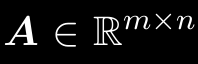

In [2]:
A = tensor( # matrix in caps
    [
        [ 1, 2, 3],
        [ 4, 5, 6],
        [ 7, 8, 9]
    ]
)
B = tensor( # matrix in caps
    [
        [-1, 2, 3],
        [ 4,-5, 6],
        [ 7, 8,-9]
    ]
)
C = tensor( # matrix in caps
    [
        [ 1, 2,-3],
        [ 4,-5, 6],
        [-7, 8, 9]
    ]
)
s_ = 1 # scalar in lower case with underscore
v1 = tensor([ 1, 2, 3]) # vectors in only lower case
v2 = tensor([-1,-2,-3]) # vectors in only lower case

### Hadamard product
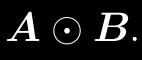

In [3]:
A*B

tensor([[ -1,   4,   9],
        [ 16, -25,  36],
        [ 49,  64, -81]])

### Dot/Matrix product
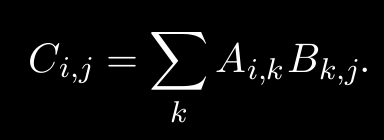

In [4]:
A@B

tensor([[ 28,  16, -12],
        [ 58,  31, -12],
        [ 88,  46, -12]])

### Matrix product is distributive
A ( B + C ) = AB + AC

In [5]:
allclose(A@(B+C), A@B+A@C)

True

### Matrix product is associative
A ( BC ) = ( AB ) C

In [6]:
allclose(A@(B@C), (A@B)@C)

True

### Matrix prduct is not commutative
AB = BA --> NOT always true

In [7]:
allclose(A@B, B@A)

False

### vector product is commutative
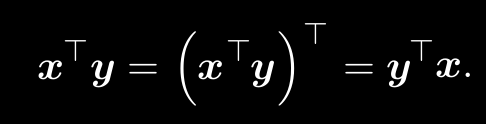

In [8]:
allclose(v1.T@v2, v2.T@v1)

True

### Transpose of a matrix product
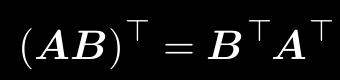

In [9]:
allclose((A@B).T, B.T@A.T)

True

---

### Linear equation

a linear equation is written as
<br>
**Ax = b**

but, to solve this equation through matrices(a compact form) we need help of:
 - identity matrix
 - inverse matrix
 
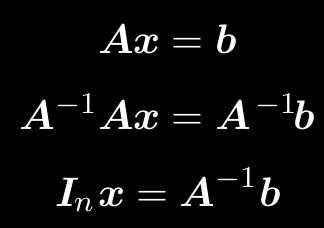

... thus

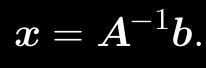

### Linear dependence and span

let's create a dummy data:

3p +  q +  r = -2
<br>
p + 3q +  r =  0
<br>
p +  q + 3r =  2
<br>
... they can be represented in a compact matrix form as:

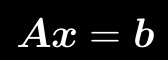

where:

In [11]:
A = tensor(
    [
        [3, 1, 1],
        [1, 3, 1],
        [1, 1, 3]
    ]
)
x = tensor([p, q, r])
b = tensor([-2, 0, 2])

Each row of A tells the different paths to reach b. If we consider each dimension (of A) as a direction then each element of x speciﬁes how far we should travel in each of that direction, with x<sub>i</sub> specifying how far to move in that direction of column i. This is called the **span** of each coloumn/dimension. 

Thus it is important to solve that all values of b we must ensure that paths do not overlap or we don't traverse the same path. This means that rows and columns must be independent. This is what a **rank** of a matrix determines.

Let's mathematically confirm if indeed A has 3 **independent** dimensions (so as to solve 3 variables)

In [ ]:
matrix_rank(A)

Suppose A did not offer independent paths.
Then we see that we cannot solve for 3-variables in 2-dimensions (we need 3-dimensions, atleast)


In [ ]:
A = tensor(
    [
        [3, 1, 1],
        [6, 2, 2],
        [1, 1, 3]
    ]
)

In [ ]:
A = tensor(
    [
        [3, 1, 2],
        [1, 3, 6], # column3 is multiple of column2
        [1, 1, 2]
    ]
)
matrix_rank(A)

Or if we add another row/column which is a multiple of the other.
Here A only seems to be 4D but adds nothing to the span of columns and is actually 3D.

In [ ]:
A = tensor(
    [
        [3, 1, 1],
        [1, 3, 1],
        [1, 1, 3],
        [2, 2, 6] # new row4 is multiple of row3
    ]
)
matrix_rank(A)

Thus to solve for m-variables, we need a matrix that **exactly** m lineardy independent columns.

Why not more than m?
Becuase then there mat be more than one of parameterising the solution. Solution then is not unique, which we don't want.

Thus the matrix must be a square matrix(m*m) with m linearly independent columns columns.
This type of matrix is called a **singular  matrix**. Becuase **only** square **and** singular matrix can be **inverted**. We can have a matrix that is singular but not square, but then we cannot invert it.

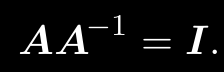

even A^(-1)*A = I

# Norms

Norms denote size of vector that its distance from origin. A norm satisfies these 3 conditions:

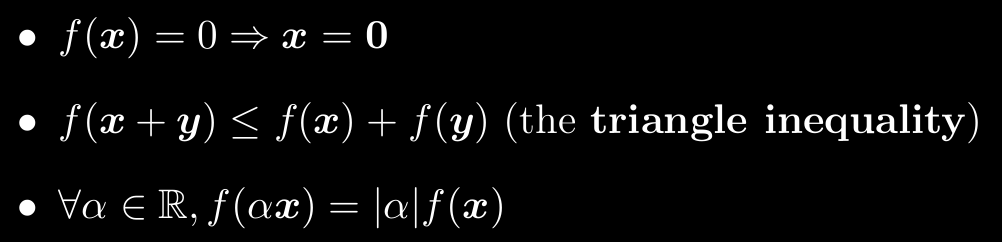

In [ ]:
print("condition-1: ", norm([0]))
print("condition-2: ", norm([15,9]), norm([3, 4]), norm([12, 5]))
print("condition-3: ", 2*norm([3, 4]), norm([6, 8]))

The Euclidean norm is the most convinient mathmatically and computationally. Calculated as:

# L<sup>2</sup> = 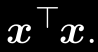

One problem with L<sup>2</sup> is that it grows very slowly near origin (0.5<sup>2</sup> is 0.25!).
Thus for values less than 1 we prefer the L<sup>1</sup> norm:

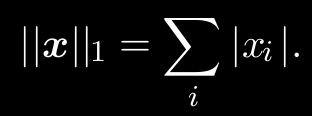

There is also L<sup>infinity</sup> norm, where you just select the element with largerst magnitude in the vector:

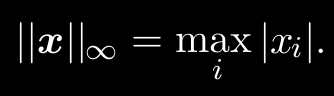

In deep learning we often need to calculate the size of a **matrix**. Here we prefer the Forbenius norm:

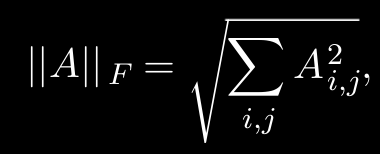

Dot product of two vectors can also be written in the form of their norms (theta is angle between them):

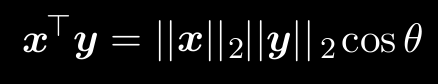


# Special cases

- Symmetrix matrix:

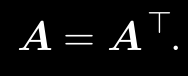

- Unit vector:

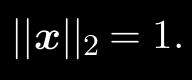

- Orthogonal vectors (theta=90):

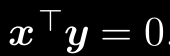

- Orthonormal vectors (thera=90 **and both** unit vectors)

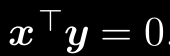 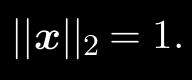

- Orthogonal matrix:

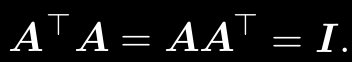

and so:  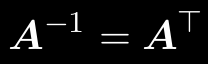
Thus their rows are both orthogonal and orthonormal!


# Eigendecomposition

Decomposing integers into its prime factors helps us discover new properties. Likewise
we can also decompose matrices to reveal its latent/hidden properties.

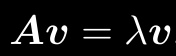
<br>
or
<br>
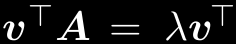

λ: eigen value
<br>
v: eigen vector

Suppose a matrix-A has rank-n(i.e. n independent dimensions). Then we can concatenate all (only real-valued) n-eigenvectors to form matrix-V, and all (only real-valued) eigenvalues as diagonal elements which scale each eigenvector. Then, the eigendecomposition is:

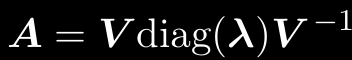

Note: the eigendecomposition is **unique** only if all of the eigenvalues are unique

# Singular Value Decomposition

The matrix is singular **iff** any of the eigenvalues are zero. SVD is another way of matrix factorization and also more generally applicatble than eigendecomposition.

Because every real matrix has a singular value decomposition, but the same is not true of the eigenvalue decomposition. For example, if a matrix is not square, the eigendecomposition is not deﬁned, and we must use a singular value decomposition instead.

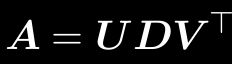

shape of A: mxn
<br>
shape of U: mxm (orthogonal matrix, eigenvectors of AA<sup>T</sup>)
<br>
shape of D: mxn (D, a diagonal matrix containing singular values of A, is **not** square)
<br>
shape of V: nxn (orthogonal matrix, eigenvectors of A<sup>T</sup>A)
<br>

Application: calculating psuedoinvers(non-square matrices)

# The Moore-Penrose Pseudoinvers

Matrix inversion is not deﬁned for matrices that are not square. Hence for those cases it may not be possible to design a unique mapping from matrix to its inverse.  If we were to solve:

Ax = y
<br>
x = By ... (where B is the inverse of A - a non square matrix)

then,
<br>
if A is taller than it is wide, then it is possible for this equation to have no solution. If A is wider than it is tall, then there could be multiple possible solutions.

The Moore-Penrose pseudoinverse allows us to make some approximations. The pseudoinverse of A is deﬁned as a matrix: 
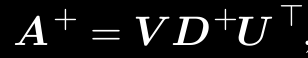
<br>
where U, D and V are the singular value decomposition of A.



# The Trace Operator

It gives the sum of all of the diagonal entries of a matrix. Its good for manipulating equations. For example the Forbenius form can be re-written as:

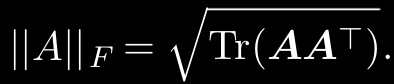

Trance is invariant to transpose:

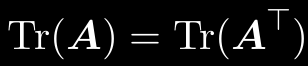

In [ ]:
A = tensor(
    [
        [ 1, 2, 3],
        [ 4, 5, 6],
        [ 7, 8, 9]
    ]
)
allclose(trace(A), trace(A.T))

Invariant to shapes of matrices, the trace operator holds if the last matrix is moved to first position 

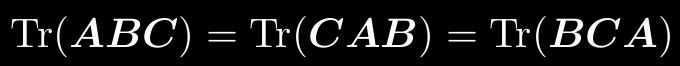

more generally ...

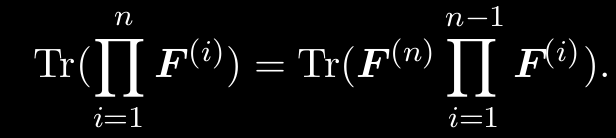

# The Determinant

The determinant is equal to the product of all the eigenvalues of the matrix. It is scalar. The absolute value of it shows how much a matrix expands or shrinks after transformation(multiplication). If the determinant is 1, then the transformation preserves volume; if 0 then volume is lost at least in one dimension.



# Principal Components Analysis

It can be derived using only knowledge of basic linear algebra. Suppose we have a collection of some points(in R<sup>n</sup>) and we want to apply lossy compression to these points. Lossy means we want less memory at the cost of precision. So we encode these points using a lower-level dimension(R<sup>l</sup>) for them; and a decoding function that approximately reconstructs the input.

This decoder is a simple matrix multiplication to map the code back to n-dimensions from l-dimensions. Let g(c) = D<sub>c</sub> , where D∈R<sup>n×l</sup> is the matrix deﬁning the decoding. To keep computation simple PCA constrains the columns of D to be orthogonal to each other.  (Note that D is still not technically “an orthogonal matrix” unless l = n )